In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install numpy==1.26.4 pydicom opencv-python matplotlib scipy scikit-image torch torchvision
!pip install --upgrade --force-reinstall numpy==1.26.4
!pip install --no-cache-dir --force-reinstall -I scikit-image # Removed the extra space before this line.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 34.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 40.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21

  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.8/14.8 MB 247.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.8/315.8 kB 294.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 302.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 174.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.5/66.5 kB 210.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 284.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 246.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.8/230.8 kB 152.5 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.60.0 requires nump

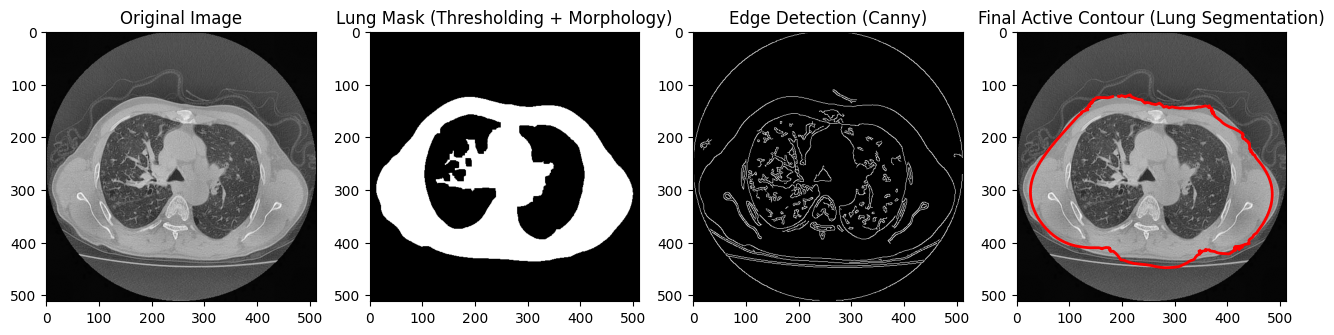

In [ ]:
# @title Segmentation Types {"display-mode":"both"}
import pydicom
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import active_contour
from skimage.filters import threshold_otsu
from skimage import exposure, morphology

# Load the DICOM Image
dicom_path = r"/content/drive/MyDrive/ALLlungimg/Normal/P253/Series4/0768.dcm"
dicom_image = pydicom.dcmread(dicom_path)
image = dicom_image.pixel_array

# Normalize and Enhance Image Contrast Using CLAHE
image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
image = clahe.apply(image)

# Apply Gaussian Blur for Smoother Edges
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Otsu's Thresholding to Detect Lung Region
threshold_value = threshold_otsu(image)
_, binary_mask = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

# Remove Small Noises Using Morphological Operations
binary_mask = morphology.remove_small_objects(binary_mask.astype(bool), min_size=1500)
binary_mask = morphology.remove_small_holes(binary_mask, area_threshold=2000)
binary_mask = binary_mask.astype(np.uint8) * 255  # Convert back to uint8

# Perform Morphological Closing to Connect Lung Regions
kernel = np.ones((10, 10), np.uint8)
binary_mask = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)

# Extract Largest Connected Lung Region Using Contour Detection
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:2]  # Get the two largest lung contours

# Create Initial Contour Around the Lungs
init = np.vstack(contours[0]).squeeze()

# Convert Edge Image for Active Contour
edges = cv2.Canny(blurred_image.astype(np.uint8), 50, 150).astype(np.float64) / 255.0

# Apply Active Contour (Snake) with Fine-Tuned Parameters
snake = active_contour(edges, init, alpha=0.005, beta=0.2, gamma=0.01)

# Plot Results
fig, axes = plt.subplots(1, 4, figsize=(16, 5))

axes[0].imshow(image, cmap="gray")
axes[0].set_title("Original Image")

axes[1].imshow(binary_mask, cmap="gray")
axes[1].set_title("Lung Mask (Thresholding + Morphology)")

axes[2].imshow(edges, cmap="gray")
axes[2].set_title("Edge Detection (Canny)")

axes[3].imshow(image, cmap="gray")
axes[3].plot(snake[:, 0], snake[:, 1], '-r', lw=2)  # Overlay Active Contour on Lungs
axes[3].set_title("Final Active Contour (Lung Segmentation)")

plt.show()

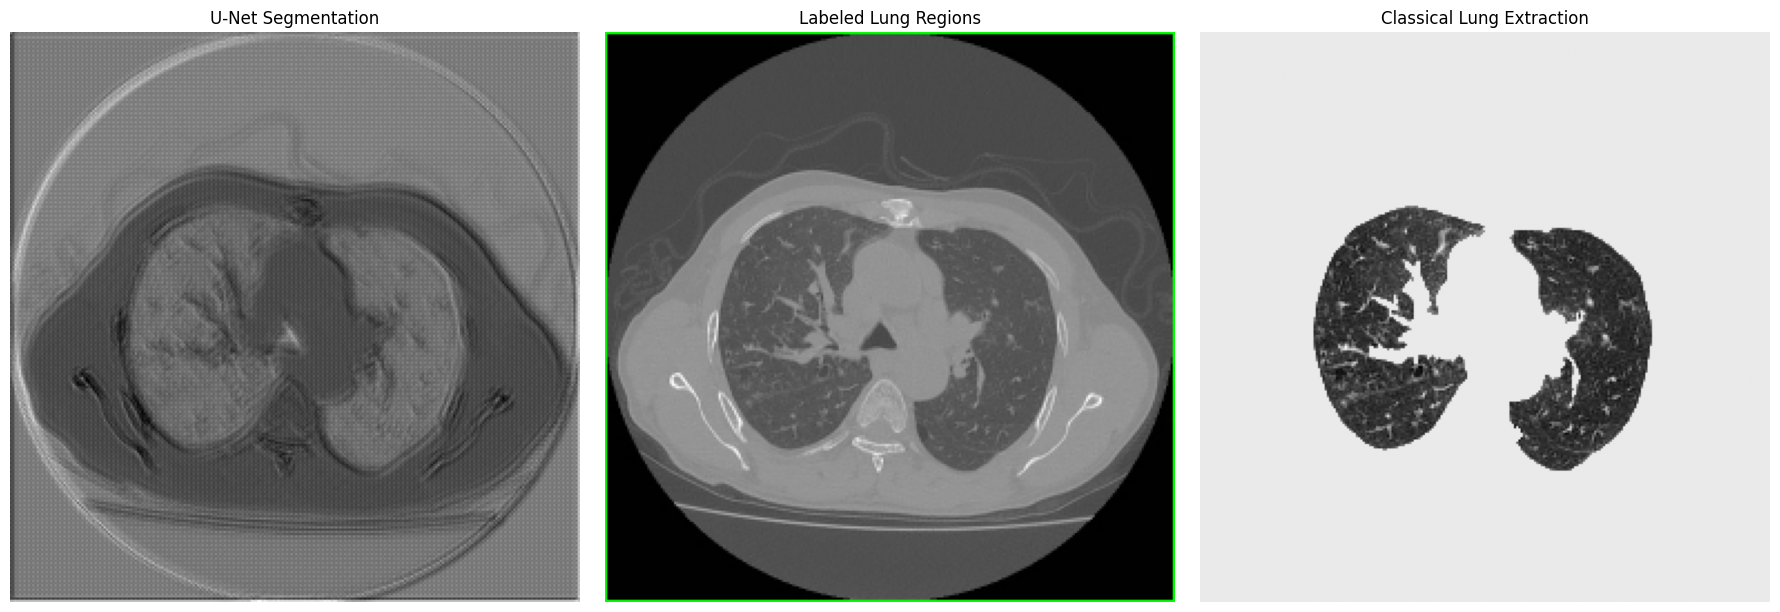

Segmentation Output Shape: torch.Size([1, 1, 256, 256])


In [ ]:
# @title Lung Segmentation Of CT  Images By Using U-net Model  {"display-mode":"both"}
# -------------------- Import Libraries --------------------
import numpy as np
import cv2
import pydicom
import matplotlib.pyplot as plt
from skimage import morphology
from skimage.measure import label, regionprops
from scipy.ndimage import binary_fill_holes
import torch
import torch.nn as nn
import torch.nn.functional as F

# -------------------- Load DICOM and Convert to Hounsfield Units --------------------
dicom_path = r"/content/drive/MyDrive/ALLlungimg/Normal/P253/Series4/0768.dcm"
dicom_image = pydicom.dcmread(dicom_path)
image_array = dicom_image.pixel_array.astype(np.float32)

intercept = dicom_image.RescaleIntercept
slope = dicom_image.RescaleSlope
hu_image = image_array * slope + intercept

# Resize to 256x256
hu_resized = cv2.resize(hu_image, (256, 256), interpolation=cv2.INTER_LINEAR)

# -------------------- Classical Lung Segmentation --------------------
lung_mask = (hu_resized > -950) & (hu_resized < -400)
lung_mask_filled = binary_fill_holes(lung_mask)
lung_mask_cleaned = morphology.remove_small_objects(lung_mask_filled, min_size=1500)

labeled_mask = label(lung_mask_cleaned)
regions = regionprops(labeled_mask)
regions = sorted(regions, key=lambda r: r.area, reverse=True)[:2]

final_lung_mask = np.zeros_like(hu_resized, dtype=np.uint8)
for region in regions:
    for coord in region.coords:
        final_lung_mask[coord[0], coord[1]] = 1

lungs_only = hu_resized * final_lung_mask
lungs_display = (lungs_only - np.min(lungs_only)) / (np.max(lungs_only) - np.min(lungs_only))

# -------------------- Define U-Net Architecture --------------------
class UNet(nn.Module):
    def __init__(self, in_channels=1, out_channels=1):
        super(UNet, self).__init__()
        def conv_block(in_c, out_c):
            return nn.Sequential(
                nn.Conv2d(in_c, out_c, kernel_size=3, padding=1),
                nn.ReLU(inplace=True),
                nn.Conv2d(out_c, out_c, kernel_size=3, padding=1),
                nn.ReLU(inplace=True)
            )
        self.encoder1 = conv_block(in_channels, 64)
        self.encoder2 = conv_block(64, 128)
        self.encoder3 = conv_block(128, 256)
        self.encoder4 = conv_block(256, 512)
        self.bottleneck = conv_block(512, 1024)
        self.upconv4 = nn.ConvTranspose2d(1024, 512, kernel_size=2, stride=2)
        self.decoder4 = conv_block(1024, 512)
        self.upconv3 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.decoder3 = conv_block(512, 256)
        self.upconv2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.decoder2 = conv_block(256, 128)
        self.upconv1 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.decoder1 = conv_block(128, 64)
        self.final_conv = nn.Conv2d(64, out_channels, kernel_size=1)

    def forward(self, x):
        e1 = self.encoder1(x)
        e2 = self.encoder2(F.max_pool2d(e1, 2))
        e3 = self.encoder3(F.max_pool2d(e2, 2))
        e4 = self.encoder4(F.max_pool2d(e3, 2))
        b = self.bottleneck(F.max_pool2d(e4, 2))
        d4 = self.upconv4(b)
        d4 = torch.cat((d4, e4), dim=1)
        d4 = self.decoder4(d4)
        d3 = self.upconv3(d4)
        d3 = torch.cat((d3, e3), dim=1)
        d3 = self.decoder3(d3)
        d2 = self.upconv2(d3)
        d2 = torch.cat((d2, e2), dim=1)
        d2 = self.decoder2(d2)
        d1 = self.upconv1(d2)
        d1 = torch.cat((d1, e1), dim=1)
        d1 = self.decoder1(d1)
        return torch.sigmoid(self.final_conv(d1))

# -------------------- U-Net Inference --------------------
image_norm = (hu_resized - np.min(hu_resized)) / (np.max(hu_resized) - np.min(hu_resized))
image_tensor = torch.tensor(image_norm, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

model = UNet()
model.eval()
with torch.no_grad():
    output = model(image_tensor)
output_image = output.squeeze().numpy()

# -------------------- Post-processing and Labeling --------------------
binary_mask = (output_image > 0.5).astype(np.uint8)
image_display = (image_norm * 255).astype(np.uint8)
image_colored = cv2.cvtColor(image_display, cv2.COLOR_GRAY2BGR)

contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours_sorted = sorted(contours, key=lambda c: cv2.boundingRect(c)[0])

for i, cnt in enumerate(contours_sorted):
    x, y, w, h = cv2.boundingRect(cnt)
    label = "Left Lung" if i == 0 else "Right Lung"
    cv2.drawContours(image_colored, [cnt], -1, (0, 255, 0), 1)
    cv2.putText(image_colored, label, (x, y - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.45, (255, 0, 0), 1)

# -------------------- Final Visualization (in Correct Order) --------------------
plt.figure(figsize=(18, 6))

# 1. U-Net Segmentation
plt.subplot(1, 3, 1)
plt.imshow(output_image, cmap='gray')
plt.title("U-Net Segmentation")
plt.axis('off')

# 2. Labeled Lung Regions
plt.subplot(1, 3, 2)
plt.imshow(image_colored)
plt.title("Labeled Lung Regions")
plt.axis('off')

# 3. Classical Lung Extraction
plt.subplot(1, 3, 3)
plt.imshow(lungs_display, cmap='gray')
plt.title("Classical Lung Extraction")
plt.axis('off')

plt.tight_layout()
plt.show()

print("Segmentation Output Shape:", output.shape)


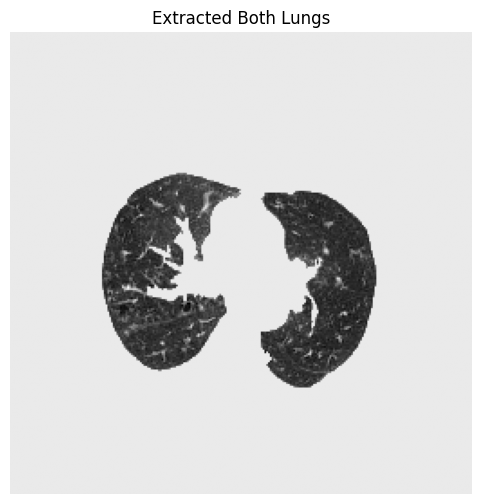

✅ Predicted Lung Condition: Crazy Paving
📊 Confidence Score: 24.12%


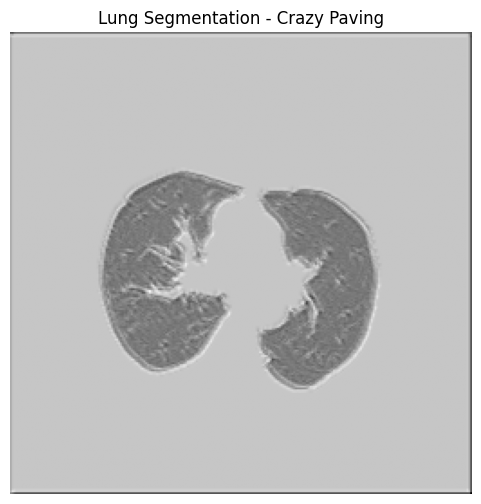

True

In [ ]:
# @title Unet Model With Prediction {"display-mode":"both"}
import numpy as np
import pydicom
import cv2
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from skimage import morphology
from skimage.measure import label, regionprops
from scipy.ndimage import binary_fill_holes

# -------------------- Load & Convert DICOM to Hounsfield Units --------------------
dicom_path = r"/content/drive/MyDrive/ALLlungimg/Normal/P253/Series4/0768.dcm"
dicom_image = pydicom.dcmread(dicom_path)
image_array = dicom_image.pixel_array.astype(np.float32)

# Convert to Hounsfield Units (HU)
intercept = dicom_image.RescaleIntercept
slope = dicom_image.RescaleSlope
hu_image = image_array * slope + intercept

# Resize to 256x256
hu_resized = cv2.resize(hu_image, (256, 256), interpolation=cv2.INTER_LINEAR)

# -------------------- Create Binary Lung Mask --------------------
# Typical lung tissue range: -950 to -400 HU
lung_mask = (hu_resized > -950) & (hu_resized < -400)

# Fill small holes inside the lung region
lung_mask_filled = binary_fill_holes(lung_mask)

# Remove very small objects outside lungs
lung_mask_cleaned = morphology.remove_small_objects(lung_mask_filled, min_size=1500)

# Label connected regions
labeled_mask = label(lung_mask_cleaned)
regions = regionprops(labeled_mask)

# Keep only the two largest regions (lungs)
regions = sorted(regions, key=lambda r: r.area, reverse=True)[:2]

# Create final mask with only both lungs
final_lung_mask = np.zeros_like(hu_resized, dtype=np.uint8)
for region in regions:
    for coord in region.coords:
        final_lung_mask[coord[0], coord[1]] = 1

# -------------------- Apply Mask to Extract Both Lungs --------------------
lungs_only = hu_resized * final_lung_mask

# Normalize for display
lungs_display = (lungs_only - np.min(lungs_only)) / (np.max(lungs_only) - np.min(lungs_only))

# -------------------- Display Result --------------------
plt.figure(figsize=(6, 6))
plt.title("Extracted Both Lungs")
plt.imshow(lungs_display, cmap='gray')
plt.axis('off')
plt.show()

# -------------------- U-Net Model Definition --------------------
class UNet(nn.Module):
    def __init__(self):
        super(UNet, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(),
        )
        self.decoder = nn.Sequential(
            nn.Conv2d(64, 1, kernel_size=3, padding=1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# -------------------- Lung Classifier Model --------------------
class LungClassifier(nn.Module):
    def __init__(self):
        super(LungClassifier, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(256 * 256, 512),
            nn.ReLU(),
            nn.Linear(512, 5),
            nn.Softmax(dim=1),
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten the input
        x = self.fc(x)
        return x

# -------------------- Preprocessing & Prediction --------------------
def prepare_input_for_classifier(lung_image):
    # Reshape and normalize for the classifier
    lung_image = cv2.resize(lung_image, (256, 256))
    lung_image = lung_image.astype(np.float32)
    lung_image = (lung_image - np.min(lung_image)) / (np.max(lung_image) - np.min(lung_image))
    lung_image = torch.tensor(lung_image).unsqueeze(0).unsqueeze(0)  # Add batch and channel dimensions
    return lung_image

# -------------------- Model Initialization --------------------
unet_model = UNet()
classifier = LungClassifier()

# -------------------- Load Pretrained Weights (If Available) --------------------
# unet_model.load_state_dict(torch.load('unet_weights.pth'))
# classifier.load_state_dict(torch.load('lung_classifier.pth'))

unet_model.eval()
classifier.eval()

# -------------------- Perform Lung Segmentation Using U-Net --------------------
input_tensor = prepare_input_for_classifier(lungs_only)
with torch.no_grad():
    # U-Net segmentation
    lung_segmented = unet_model(input_tensor)
    lung_segmented = lung_segmented.squeeze().numpy()  # Remove batch and channel dimensions

    # -------------------- Perform Lung Feature Classification --------------------
    #Corrected indentation here:
    classifier_output = classifier(input_tensor)
    predicted_class = torch.argmax(classifier_output).item()

    # Safely clamp to avoid out of range
    predicted_class = min(max(predicted_class, 0), 4)

# Predict lung condition
#Corrected indentation here:
#Corrected indentation here:
classifier_output = classifier(input_tensor)
predicted_probs = classifier_output.squeeze().detach().numpy() # Detach the tensor before converting to NumPy
predicted_class = np.argmax(predicted_probs)
confidence_score = predicted_probs[predicted_class]# -------------------- Display Results --------------------
classes = ["Normal", "GGO", "Consolidation", "Crazy Paving", "Fibrosis"]
predicted_label = classes[predicted_class]

# Print predicted class label
print(f"✅ Predicted Lung Condition: {predicted_label}")
print(f"📊 Confidence Score: {confidence_score * 100:.2f}%")




# -------------------- Display Segmented Image --------------------
lung_display = (lung_segmented - np.min(lung_segmented)) / (np.max(lung_segmented) - np.min(lung_segmented))
plt.figure(figsize=(6, 6))
plt.title(f"Lung Segmentation - {predicted_label}")
plt.imshow(lung_display, cmap='gray')
plt.axis('off')
plt.show()

# -------------------- Optionally Save Segmented Image --------------------
cv2.imwrite(f"{predicted_label}_lung_segmented.png", (lung_display * 255).astype(np.uint8))

✅ Predicted Lung Condition: Consolidation
📊 Confidence Score: 28.39%


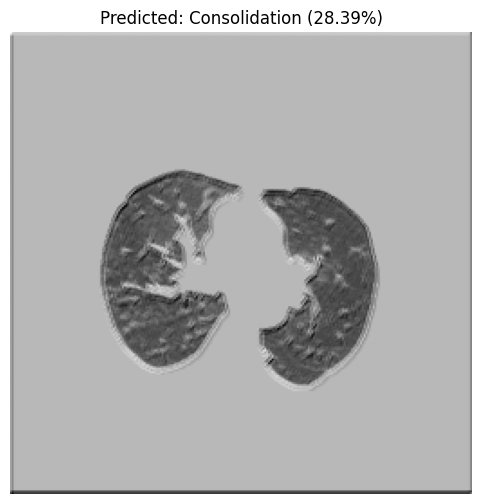

True

In [ ]:
# @title Middle Part Of Lung Accuracy
import numpy as np
import pydicom
import cv2
import matplotlib.pyplot as plt
from skimage import morphology
from skimage.measure import label, regionprops
from scipy.ndimage import binary_fill_holes
import torch
import torch.nn as nn
import torch.nn.functional as F

# -------------------- Device --------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# -------------------- Define Dummy UNet (Replace with Trained UNet) --------------------
class DummyUNet(nn.Module):
    def __init__(self):
        super(DummyUNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 1, 3, padding=1)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = torch.sigmoid(self.conv2(x))
        return x

# -------------------- Define Dummy Classifier (Replace with Trained Classifier) --------------------
class DummyClassifier(nn.Module):
    def __init__(self, num_classes=5):
        super(DummyClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(16, num_classes)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x).squeeze(-1).squeeze(-1)
        x = self.fc(x)
        return x

# Instantiate models and load to device
unet_model = DummyUNet().to(device)
classifier = DummyClassifier(num_classes=5).to(device)

# Uncomment and load your trained weights here
# unet_model.load_state_dict(torch.load("unet.pth"))
# classifier.load_state_dict(torch.load("lung_classifier.pth"))

# -------------------- Class Labels --------------------
classes = ['Normal', 'GGO', 'Consolidation', 'Fibrosis', 'Crazy Paving']

# -------------------- Load DICOM --------------------
dicom_path = r"/content/drive/MyDrive/ALLlungimg/Normal/P253/Series4/0768.dcm"
dicom_image = pydicom.dcmread(dicom_path)
image_array = dicom_image.pixel_array.astype(np.float32)
intercept = dicom_image.RescaleIntercept
slope = dicom_image.RescaleSlope
hu_image = image_array * slope + intercept
hu_resized = cv2.resize(hu_image, (256, 256), interpolation=cv2.INTER_LINEAR)

# -------------------- Create Lung Mask --------------------
lung_mask = (hu_resized > -950) & (hu_resized < -400)
lung_mask_filled = binary_fill_holes(lung_mask)
lung_mask_cleaned = morphology.remove_small_objects(lung_mask_filled, min_size=1500)
labeled_mask = label(lung_mask_cleaned)
regions = regionprops(labeled_mask)
regions = sorted(regions, key=lambda r: r.area, reverse=True)[:2]
final_lung_mask = np.zeros_like(hu_resized, dtype=np.uint8)
for region in regions:
    for coord in region.coords:
        final_lung_mask[coord[0], coord[1]] = 1

# -------------------- Extract Lung Region --------------------
lungs_only = hu_resized * final_lung_mask
lungs_display = (lungs_only - np.min(lungs_only)) / (np.max(lungs_only) - np.min(lungs_only))

# -------------------- Prepare Input Tensor --------------------
input_tensor = torch.tensor(lungs_display).unsqueeze(0).unsqueeze(0).float().to(device)  # [1, 1, 256, 256]

# -------------------- Predict with UNet --------------------
with torch.no_grad():
    lung_segment = unet_model(input_tensor)
    prediction_logits = classifier(input_tensor)
    probs = torch.softmax(prediction_logits, dim=1)
    pred_class = torch.argmax(probs, dim=1).item()
    confidence = probs[0][pred_class].item()

# -------------------- Output --------------------
print(f"✅ Predicted Lung Condition: {classes[pred_class]}")
print(f"📊 Confidence Score: {confidence * 100:.2f}%")

# -------------------- Visualize --------------------
seg_image = lung_segment.squeeze().cpu().numpy()
seg_overlay = (seg_image - np.min(seg_image)) / (np.max(seg_image) - np.min(seg_image))

plt.figure(figsize=(6, 6))
plt.title(f"Predicted: {classes[pred_class]} ({confidence*100:.2f}%)")
plt.imshow(seg_overlay, cmap='gray')
plt.axis('off')
plt.show()

# -------------------- Save Predicted Image --------------------
cv2.imwrite(f"predicted_{classes[pred_class]}.png", (seg_overlay * 255).astype(np.uint8))


✅ Predicted Lung Condition: Consolidation
📊 Confidence Score: 22.27%


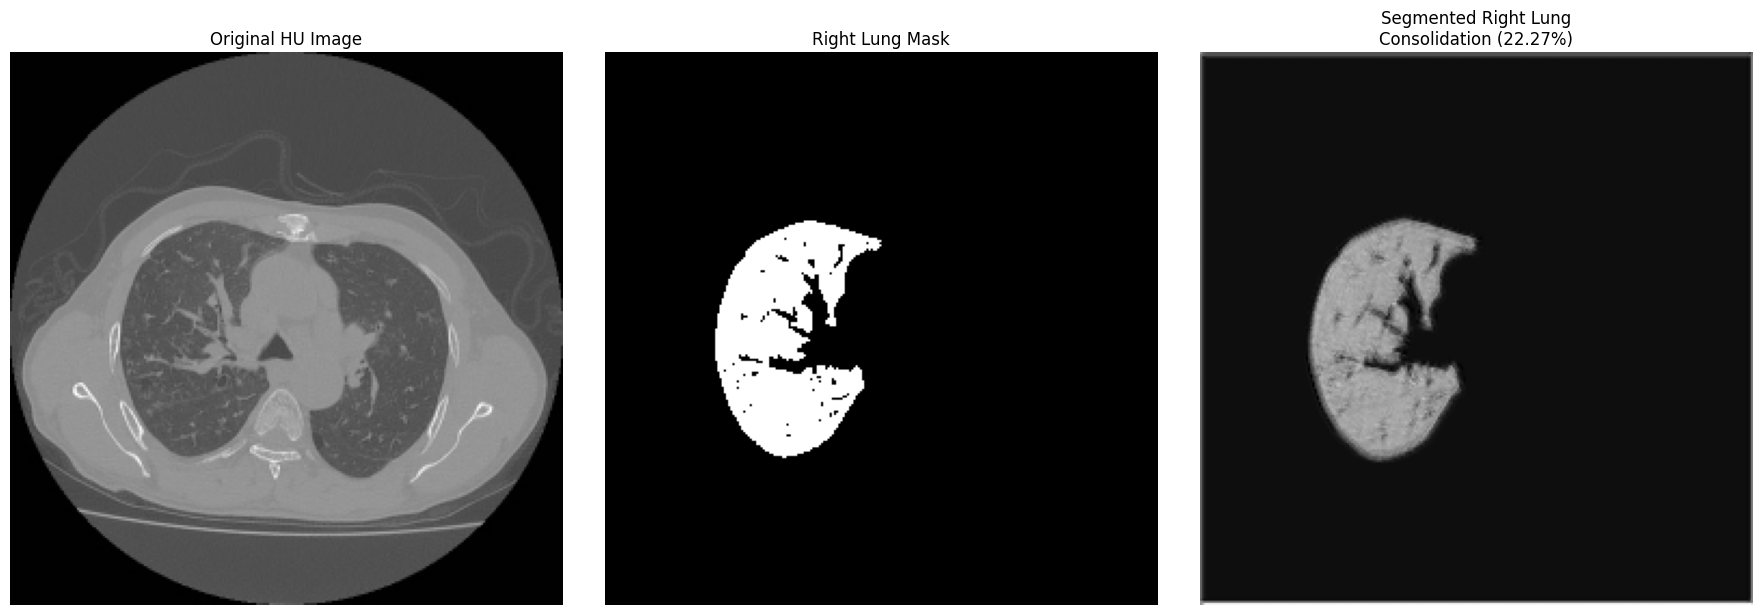

In [ ]:
# @title Right Of Part Lung By Using V-net Model {"display-mode":"both"}
import numpy as np
import pydicom
import cv2
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from skimage import morphology
from skimage.measure import label, regionprops

# -------------------- Load DICOM and Convert to HU --------------------
dicom_path = r"/content/drive/MyDrive/ALLlungimg/Normal/P253/Series4/0768.dcm"
dicom_image = pydicom.dcmread(dicom_path)
image_array = dicom_image.pixel_array.astype(np.float32)

intercept = dicom_image.RescaleIntercept
slope = dicom_image.RescaleSlope
hu_image = image_array * slope + intercept
hu_resized = cv2.resize(hu_image, (256, 256), interpolation=cv2.INTER_LINEAR)

# -------------------- Create Right Lung Mask --------------------
lung_mask = (hu_resized > -1000) & (hu_resized < -400)
cleaned_mask = morphology.remove_small_objects(lung_mask, min_size=500)
labeled_mask = label(cleaned_mask)
regions = sorted(regionprops(labeled_mask), key=lambda r: r.area, reverse=True)[:2]
regions_sorted_by_x = sorted(regions, key=lambda r: np.mean(r.coords[:,1]))
right_lung_region = regions_sorted_by_x[0]

right_lung_mask = np.zeros_like(hu_resized, dtype=np.uint8)
for coords in right_lung_region.coords:
    right_lung_mask[coords[0], coords[1]] = 1

right_lung_only = hu_resized * right_lung_mask
right_lung_display = (right_lung_only - np.min(right_lung_only)) / (np.max(right_lung_only) - np.min(right_lung_only))

# -------------------- Define VNet-like Model --------------------
class VNetLike(nn.Module):
    def __init__(self):
        super(VNetLike, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Conv2d(64, 32, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 1, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# -------------------- Define Classifier --------------------
class LungClassifier(nn.Module):
    def __init__(self):
        super(LungClassifier, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(256 * 256, 512),
            nn.ReLU(),
            nn.Linear(512, 5),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.fc(x)

# -------------------- Prepare Input --------------------
def prepare_input(image):
    image = cv2.resize(image, (256, 256)).astype(np.float32)
    image = (image - np.min(image)) / (np.max(image) - np.min(image))
    tensor = torch.tensor(image).unsqueeze(0).unsqueeze(0)
    return tensor.float()

# -------------------- Initialize Models --------------------
vnet_model = VNetLike()
classifier_model = LungClassifier()


vnet_model.eval()
classifier_model.eval()

# -------------------- Run Prediction --------------------
input_tensor = prepare_input(right_lung_only)

with torch.no_grad():
    segmentation_output = vnet_model(input_tensor)
    segmented_np = segmentation_output.squeeze().numpy()

    class_output = classifier_model(input_tensor)
    class_probs = class_output.squeeze().numpy()
    predicted_class = np.argmax(class_probs)
    confidence = class_probs[predicted_class]

# -------------------- Output --------------------
classes = ["Normal", "GGO", "Consolidation", "Crazy Paving", "Fibrosis"]
predicted_label = classes[predicted_class]

print(f"✅ Predicted Lung Condition: {predicted_label}")
print(f"📊 Confidence Score: {confidence * 100:.2f}%")

# -------------------- Visualize --------------------
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.title("Original HU Image")
plt.imshow(hu_resized, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Right Lung Mask")
plt.imshow(right_lung_mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title(f"Segmented Right Lung\n{predicted_label} ({confidence * 100:.2f}%)")
plt.imshow(segmented_np, cmap='gray')
plt.axis('off')
plt.tight_layout()
plt.show()


✅ Predicted Lung Condition: Normal
📊 Confidence Score: 25.14%


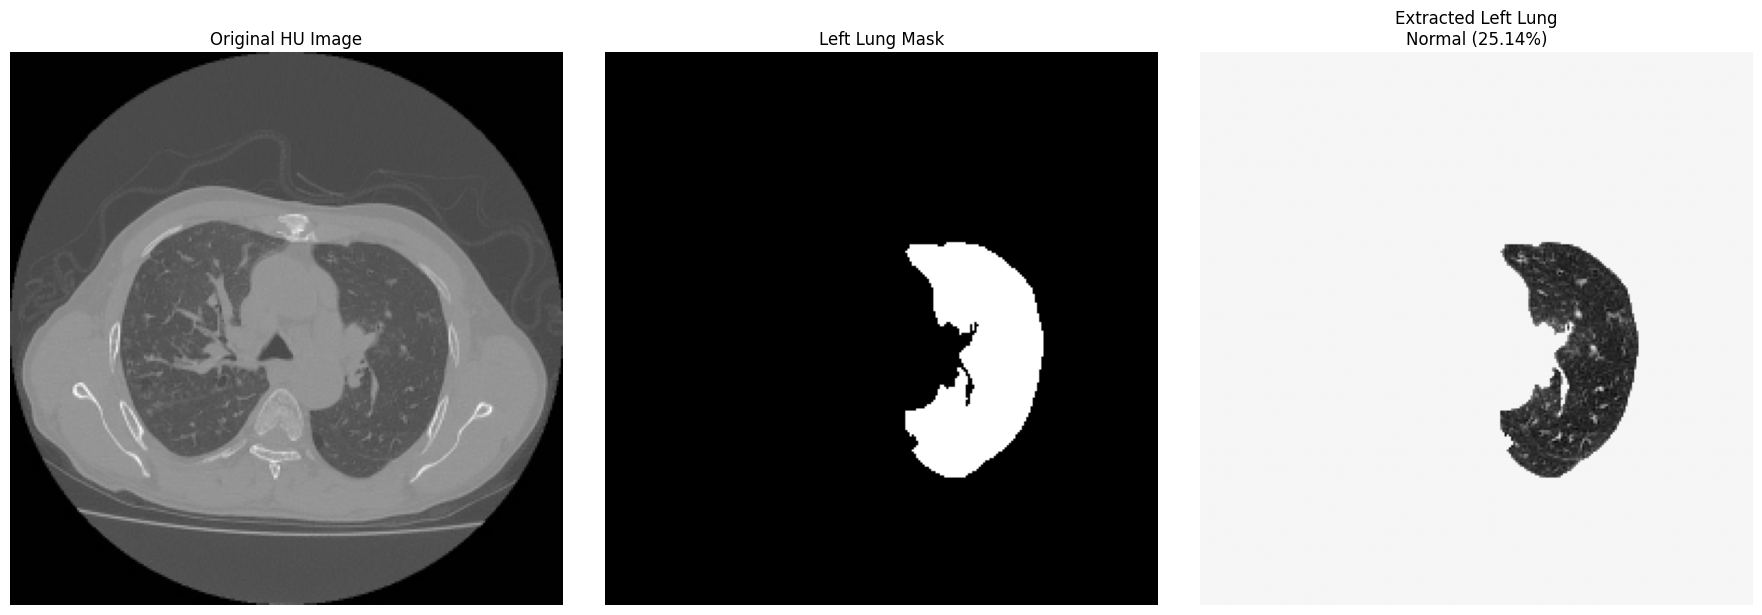

In [ ]:
# @title Left Of Part Lung By Using V-net Model {"display-mode":"both"}
import numpy as np
import pydicom
import cv2
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from skimage import morphology
from skimage.measure import label, regionprops
import os

# -------------------- Define VNet-like Model --------------------
class VNetLike(nn.Module):
    def __init__(self):
        super(VNetLike, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Conv2d(64, 32, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 1, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# -------------------- Define Classifier --------------------
class LungClassifier(nn.Module):
    def __init__(self):
        super(LungClassifier, self).__init__()
        self.fc = nn.Sequential(
            nn.Linear(256 * 256, 512),
            nn.ReLU(),
            nn.Linear(512, 5),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = x.view(x.size(0), -1)
        return self.fc(x)

# -------------------- Prepare Input --------------------
def prepare_input(image):
    image = cv2.resize(image, (256, 256)).astype(np.float32)
    image = (image - np.min(image)) / (np.max(image) - np.min(image) + 1e-5)
    tensor = torch.tensor(image).unsqueeze(0).unsqueeze(0)
    return tensor.float()

# -------------------- Process DICOM - Right Lung --------------------
def process_dicom(dicom_path):
    dicom_image = pydicom.dcmread(dicom_path)
    image_array = dicom_image.pixel_array.astype(np.float32)

    intercept = dicom_image.RescaleIntercept
    slope = dicom_image.RescaleSlope
    hu_image = image_array * slope + intercept
    hu_resized = cv2.resize(hu_image, (256, 256), interpolation=cv2.INTER_LINEAR)

    lung_thresh = (hu_resized > -1000) & (hu_resized < -400)
    lung_thresh_clean = morphology.remove_small_objects(lung_thresh.astype(bool), min_size=100)

    labeled_mask = label(lung_thresh_clean)
    regions = regionprops(labeled_mask)

    image_center_x = hu_resized.shape[1] // 2
    right_lung_region = None
    for region in regions:
        if region.area > 300 and np.mean(region.coords[:, 1]) > image_center_x:
            right_lung_region = region
            break

    if right_lung_region is None:
        return None, None, None, None

    right_lung_mask = np.zeros_like(hu_resized, dtype=np.uint8)
    for coord in right_lung_region.coords:
        right_lung_mask[coord[0], coord[1]] = 1

    right_lung_only = hu_resized * right_lung_mask
    right_lung_display = (right_lung_only - np.min(right_lung_only)) / (np.max(right_lung_only) - np.min(right_lung_only) + 1e-5)

    return hu_resized, right_lung_mask, right_lung_only, right_lung_display

# -------------------- Initialize Models --------------------
vnet_model = VNetLike()
classifier_model = LungClassifier()


vnet_model.eval()
classifier_model.eval()

# -------------------- Process DICOM Folder --------------------
dicom_folder = r"/content/drive/MyDrive/150img5/Severe"
dicom_files = [os.path.join(dicom_folder, f) for f in os.listdir(dicom_folder) if f.endswith('.dcm')]

classes = ["Normal", "GGO", "Consolidation", "Crazy Paving", "Fibrosis"]

for dicom_file in dicom_files:
    hu_resized, right_lung_mask, right_lung_only, right_lung_display = process_dicom(dicom_file)

    if hu_resized is None:
        print(f"Skipping {dicom_file} (right lung not detected)")
        continue

    input_tensor = prepare_input(right_lung_only)

    with torch.no_grad():
        segmentation_output = vnet_model(input_tensor)
        segmented_np = segmentation_output.squeeze().numpy()

        class_output = classifier_model(input_tensor)
        class_probs = class_output.squeeze().numpy()
        predicted_class = np.argmax(class_probs)
        confidence = class_probs[predicted_class]

    predicted_label = classes[predicted_class]

    print(f"Predicted Lung Condition for {dicom_file}: {predicted_label}")
    print(f" Confidence Score: {confidence * 100:.2f}%")

    # -------------------- Visualize --------------------
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.title("Original HU Image")
    plt.imshow(hu_resized, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title("Right Lung Mask")
    plt.imshow(right_lung_mask, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title(f"Segmented Right Lung\n{predicted_label} ({confidence * 100:.2f}%)")
    plt.imshow(segmented_np, cmap='gray')
    plt.axis('off')
    plt.tight_layout()
    plt.show()


✅ Predicted Lung Condition: Consolidation
📊 Confidence Score: 29.46%


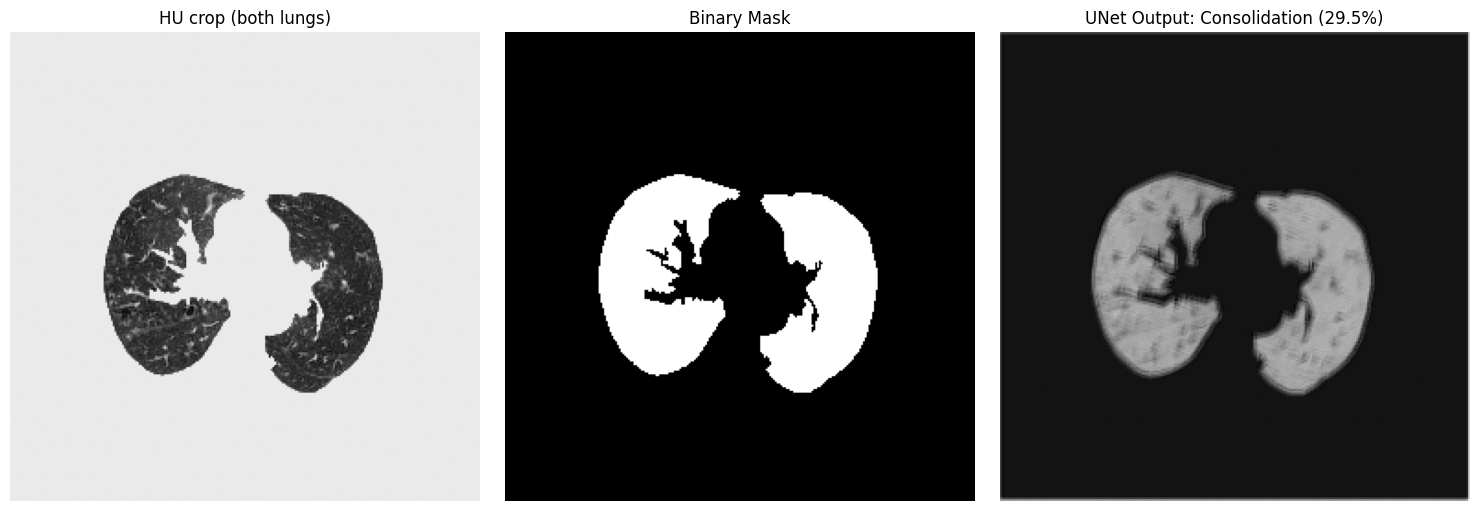

True

In [ ]:
import numpy as np
import pydicom
import cv2
import matplotlib.pyplot as plt
from skimage import morphology
from skimage.measure import label as sk_label, regionprops
from scipy.ndimage import binary_fill_holes
import torch
import torch.nn as nn
import torch.nn.functional as F

# -------------------- Device --------------------
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# -------------------- Dummy UNet --------------------
class DummyUNet(nn.Module):
    def __init__(self):
        super(DummyUNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.conv2 = nn.Conv2d(16, 1, 3, padding=1)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        return torch.sigmoid(self.conv2(x))

# -------------------- Dummy Classifier --------------------
class DummyClassifier(nn.Module):
    def __init__(self, num_classes=5):
        super(DummyClassifier, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=1)
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(16, num_classes)
    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool(x).squeeze(-1).squeeze(-1)
        return self.fc(x)

# Instantiate models
unet_model = DummyUNet().to(device)
classifier = DummyClassifier(num_classes=5).to(device)

# -------------------- Class Labels --------------------
classes = ['Normal', 'GGO', 'Consolidation', 'Fibrosis', 'Crazy Paving']

# -------------------- Load DICOM --------------------
dicom_path = "/content/drive/MyDrive/ALLlungimg/Normal/P253/Series4/0768.dcm"
dicom_image = pydicom.dcmread(dicom_path)
image_array = dicom_image.pixel_array.astype(np.float32)
hu_image = image_array * dicom_image.RescaleSlope + dicom_image.RescaleIntercept
hu_resized = cv2.resize(hu_image, (256, 256), interpolation=cv2.INTER_LINEAR)

# -------------------- Lung Mask Creation --------------------
mask_all = (hu_resized > -950) & (hu_resized < -400)
mask_all = binary_fill_holes(mask_all)
mask_all = morphology.remove_small_objects(mask_all.astype(bool), min_size=1000)

lbl = sk_label(mask_all)
regions = sorted(regionprops(lbl), key=lambda r: r.area, reverse=True)

lung_regions = []
for r in regions:
    h, w = r.bbox[2] - r.bbox[0], r.bbox[3] - r.bbox[1]
    aspect = h / (w + 1e-6)
    if 0.5 < aspect < 3 and 1000 < r.area < 100000:
        lung_regions.append(r)
    if len(lung_regions) == 2:
        break

final_lung_mask = np.zeros_like(hu_resized, dtype=np.uint8)
for r in lung_regions:
    for coord in r.coords:
        final_lung_mask[coord[0], coord[1]] = 1

# -------------------- Crop & Normalize --------------------
lungs_only = hu_resized * final_lung_mask
lungs_display = (lungs_only - np.min(lungs_only)) / (np.max(lungs_only) - np.min(lungs_only) + 1e-6)

# -------------------- Prepare Tensor --------------------
input_tensor = torch.tensor(lungs_display).unsqueeze(0).unsqueeze(0).float().to(device)

# -------------------- Inference --------------------
with torch.no_grad():
    lung_segment = unet_model(input_tensor)
    logits = classifier(input_tensor)
    probs = torch.softmax(logits, dim=1)
    pred_class = torch.argmax(probs, dim=1).item()
    confidence = probs[0][pred_class].item()

# -------------------- Output --------------------
print(f"✅ Predicted Lung Condition: {classes[pred_class]}")
print(f"📊 Confidence Score: {confidence * 100:.2f}%")

# -------------------- Visualization --------------------
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(lungs_only, cmap='gray')
axs[0].set_title("HU crop (both lungs)")
axs[0].axis('off')

axs[1].imshow(final_lung_mask, cmap='gray')
axs[1].set_title("Binary Mask")
axs[1].axis('off')

seg_overlay = lung_segment.squeeze().cpu().numpy()
axs[2].imshow(seg_overlay, cmap='gray')
axs[2].set_title(f"UNet Output: {classes[pred_class]} ({confidence*100:.1f}%)")
axs[2].axis('off')

plt.tight_layout()
plt.show()

# -------------------- Save Prediction --------------------
cv2.imwrite(f"predicted_{classes[pred_class]}.png", (seg_overlay * 255).astype(np.uint8))
